In [1]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.insert(0, '../src/')

In [4]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [13]:
plot_typography(False, 12, 14, 16)

In [5]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log_new")

In [6]:
el = EnvLogger("PongNoFrameskip-v4", log_dir, 100)

In [7]:
el.params_df.columns

Index(['env_name', 'num_envs', 'n_stack', 'rollout_size', 'num_updates',
       'max_grad_norm', 'icm_beta', 'value_coeff', 'entropy_coeff',
       'attention_target', 'attention_type', 'reward_type', 'timestamp',
       'mean_reward', 'mean_feat_std', 'mean_proxy'],
      dtype='object')

In [8]:
cols = ['attention_target', 'attention_type', 'env_name', 
        'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']

In [ ]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

In [ ]:
el.plot_mean_std(*["rewards"])

In [ ]:
el.plot_mean_std(*["features"])

In [ ]:
el.plot_proxy()

In [ ]:
el.plot_rewards()

key=2019-09-25 07_43_47, feat_std=0.24587754905223846
key=2019-09-26 03_14_41, feat_std=0.2701767086982727
key=2019-09-26 22_46_44, feat_std=0.26503637433052063
key=2019-09-27 18_21_48, feat_std=0.4465710520744324
key=2019-09-28 15_27_56, feat_std=0.2547535300254822


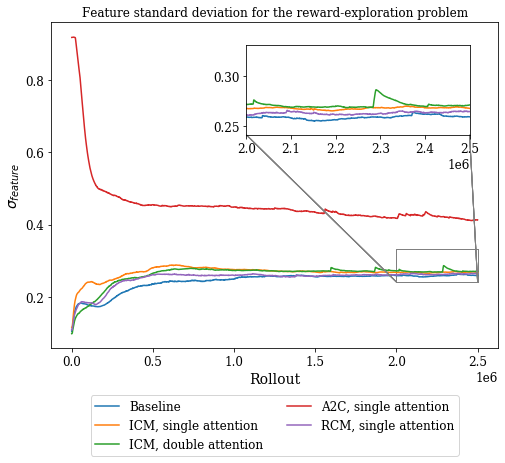

In [12]:
el.plot_feat_std()